In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r'D:\Downloads\Phishing Data.csv')

In [3]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


In [4]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [5]:
df.shape

(2456, 31)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,2456.0,0.113192,0.316892,0.0,0.0,0.0,0.0,1.0
URL_Length,2456.0,-0.649837,0.752690,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,2456.0,0.122964,0.328463,0.0,0.0,0.0,0.0,1.0
having_At_Symbol,2456.0,0.054560,0.227166,0.0,0.0,0.0,0.0,1.0
double_slash_redirecting,2456.0,0.125407,0.331247,0.0,0.0,0.0,0.0,1.0
Prefix_Suffix,2456.0,-0.254886,0.676170,-1.0,-1.0,0.0,0.0,1.0
having_Sub_Domain,2456.0,-0.185668,0.802068,-1.0,-1.0,0.0,0.0,1.0
SSLfinal_State,2456.0,0.255700,0.912332,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,2456.0,0.018730,0.798455,-1.0,-1.0,0.0,1.0,1.0
Favicon,2456.0,0.189739,0.392175,0.0,0.0,0.0,0.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

no missing values in the dataset

In [8]:
df.shape

(2456, 31)

In [9]:
for col in df.columns:
    unique_value_list = df[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {df[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

having_IP_Address contains:			[1 0]
URL_Length contains:			[ 1  0 -1]
Shortining_Service contains:			[0 1]
having_At_Symbol contains:			[0 1]
double_slash_redirecting contains:			[1 0]
Prefix_Suffix contains:			[-1  0  1]
having_Sub_Domain contains:			[-1  0  1]
SSLfinal_State contains:			[-1  1  0]
Domain_registeration_length contains:			[ 0  1 -1]
Favicon contains:			[0 1]
port contains:			[0 1]
HTTPS_token contains:			[1 0]
Request_URL contains:			[ 1 -1]
URL_of_Anchor contains:			[-1  0  1]
Links_in_tags contains:			[ 1 -1  0]
SFH contains:			[-1  1]
Submitting_to_email contains:			[1 0]
Abnormal_URL contains:			[1 0]
Redirect contains:			[0 1]
on_mouseover contains:			[0 1]
RightClick contains:			[0 1]
popUpWidnow contains:			[0 1]
Iframe contains:			[0 1]
age_of_domain contains:			[-1  0  1]
DNSRecord contains:			[1 0]
web_traffic contains:			[-1  0  1]
Page_Rank contains:			[-1  0  1]
Google_Index contains:			[0 1]
Links_pointing_to_page contains:			[ 1  0 -1]
Statistical_report

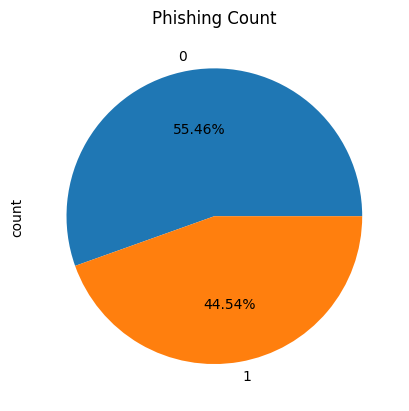

In [10]:
df ['Result'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

<Axes: xlabel='Page_Rank'>

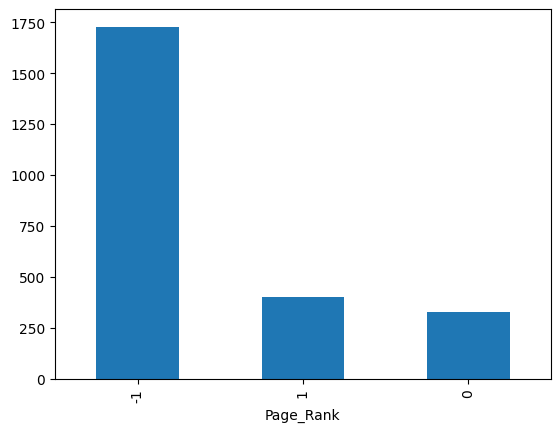

In [11]:
df['Page_Rank'].value_counts().plot.bar()

<Axes: xlabel='Google_Index'>

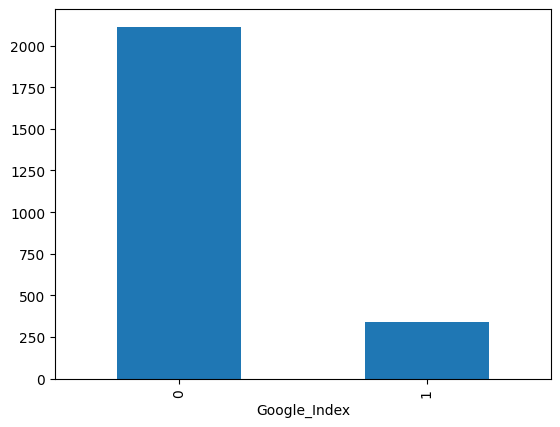

In [12]:
df['Google_Index'].value_counts().plot.bar()

<Axes: xlabel='URL_Length'>

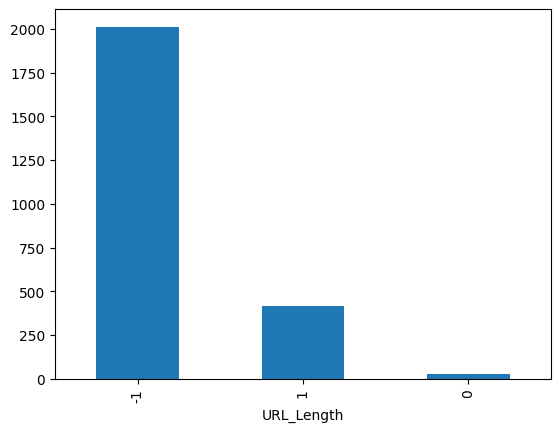

In [13]:
df['URL_Length'].value_counts().plot.bar()

<Axes: xlabel='having_At_Symbol'>

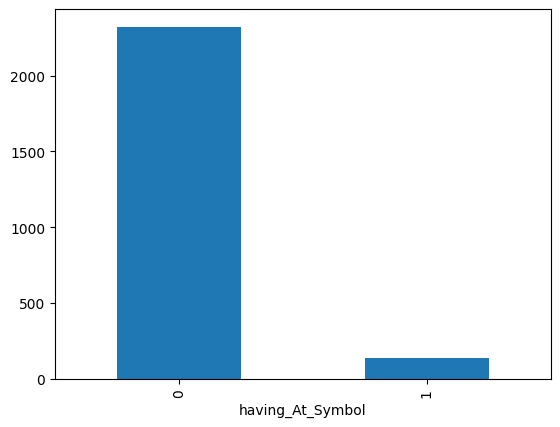

In [14]:
df['having_At_Symbol'].value_counts().plot.bar()


<Axes: xlabel='double_slash_redirecting'>

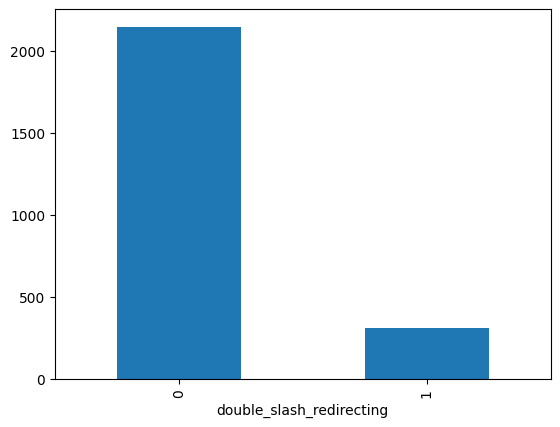

In [15]:
df['double_slash_redirecting'].value_counts()	.plot.bar()


<Axes: xlabel='Prefix_Suffix'>

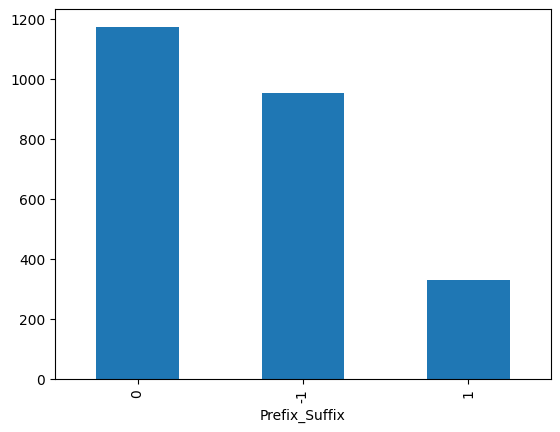

In [16]:
df['Prefix_Suffix'].value_counts()	.plot.bar()


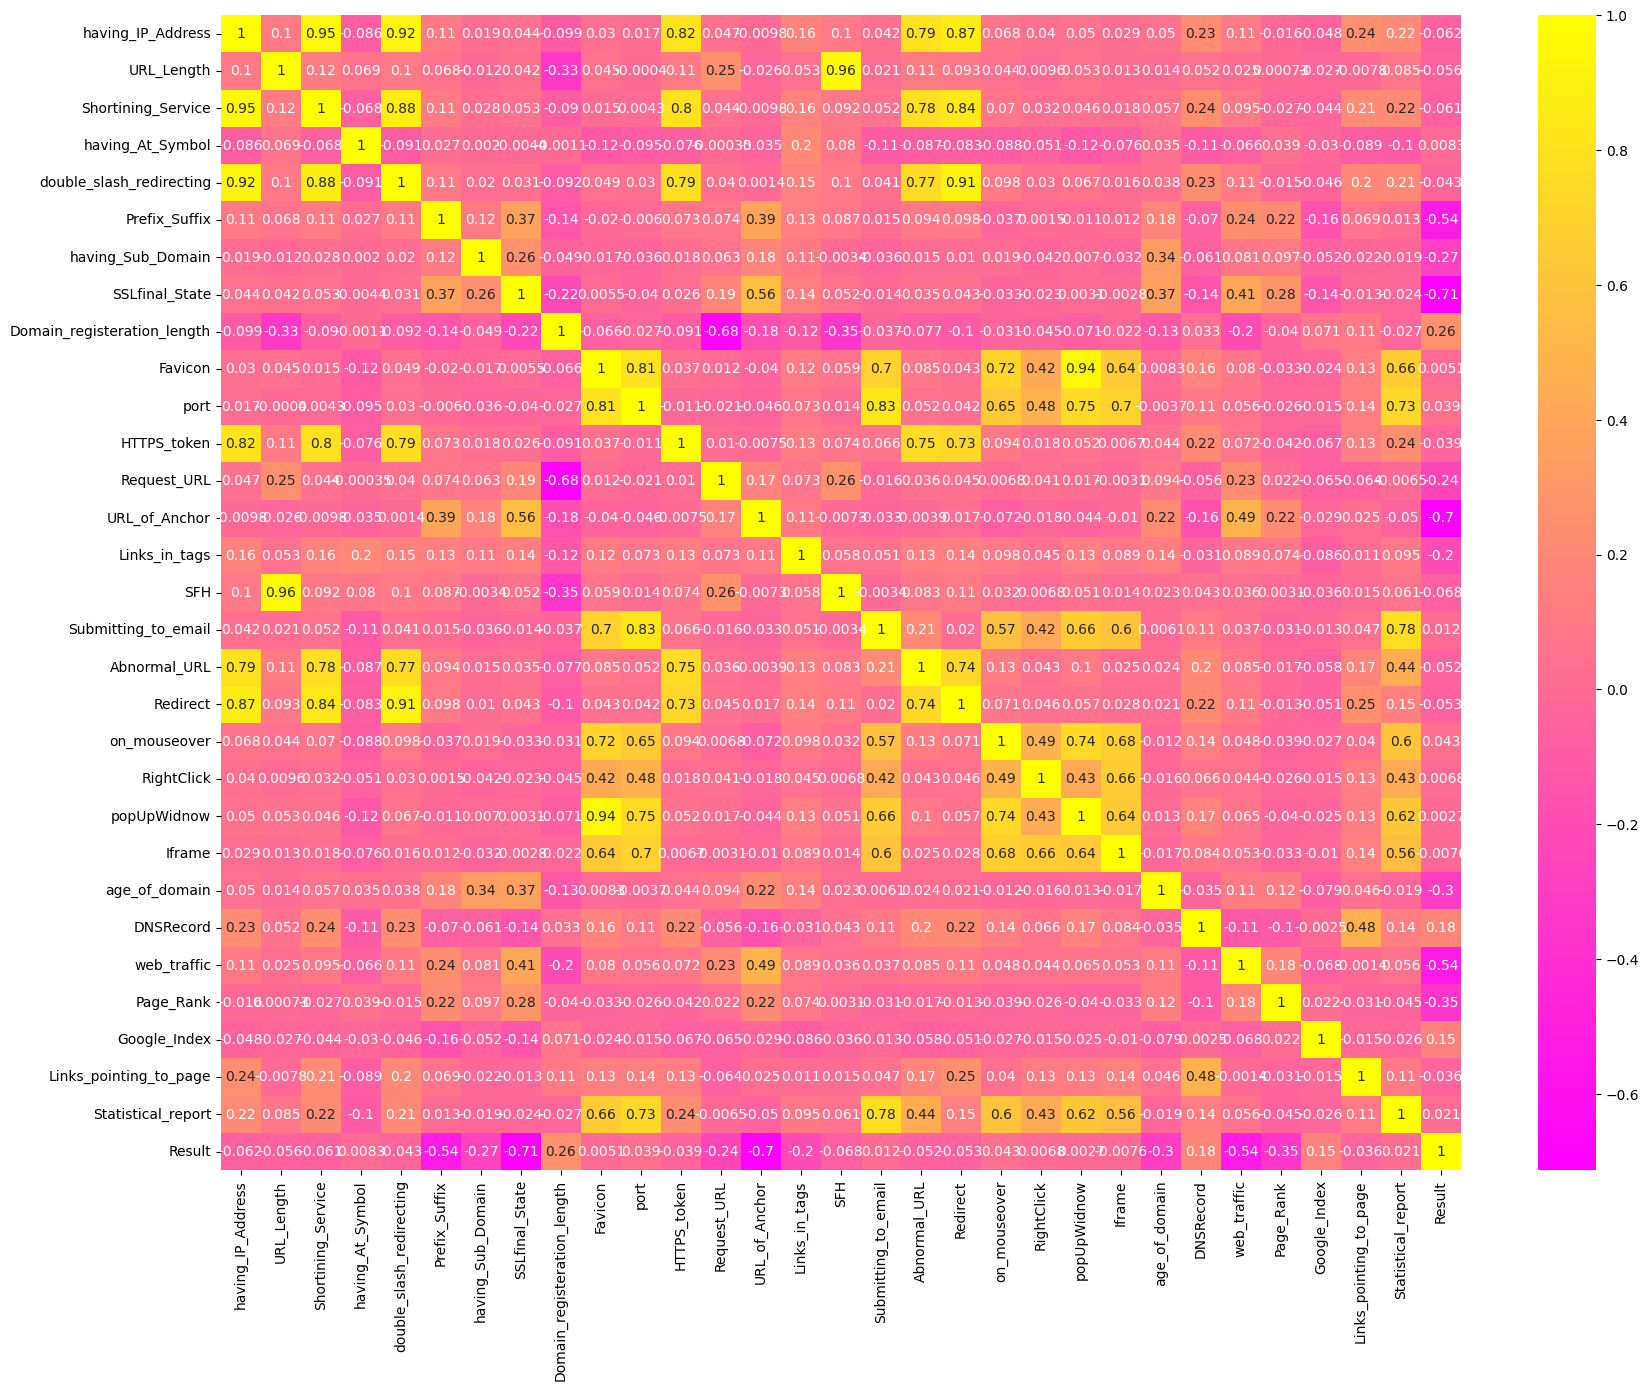

In [17]:
# visualzing  the data simple concept is 
#lower the color higher the value and viceversa
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="spring")
plt.show()

In [18]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [19]:
df['Result'].value_counts(normalize=True)

Result
0    0.55456
1    0.44544
Name: proportion, dtype: float64

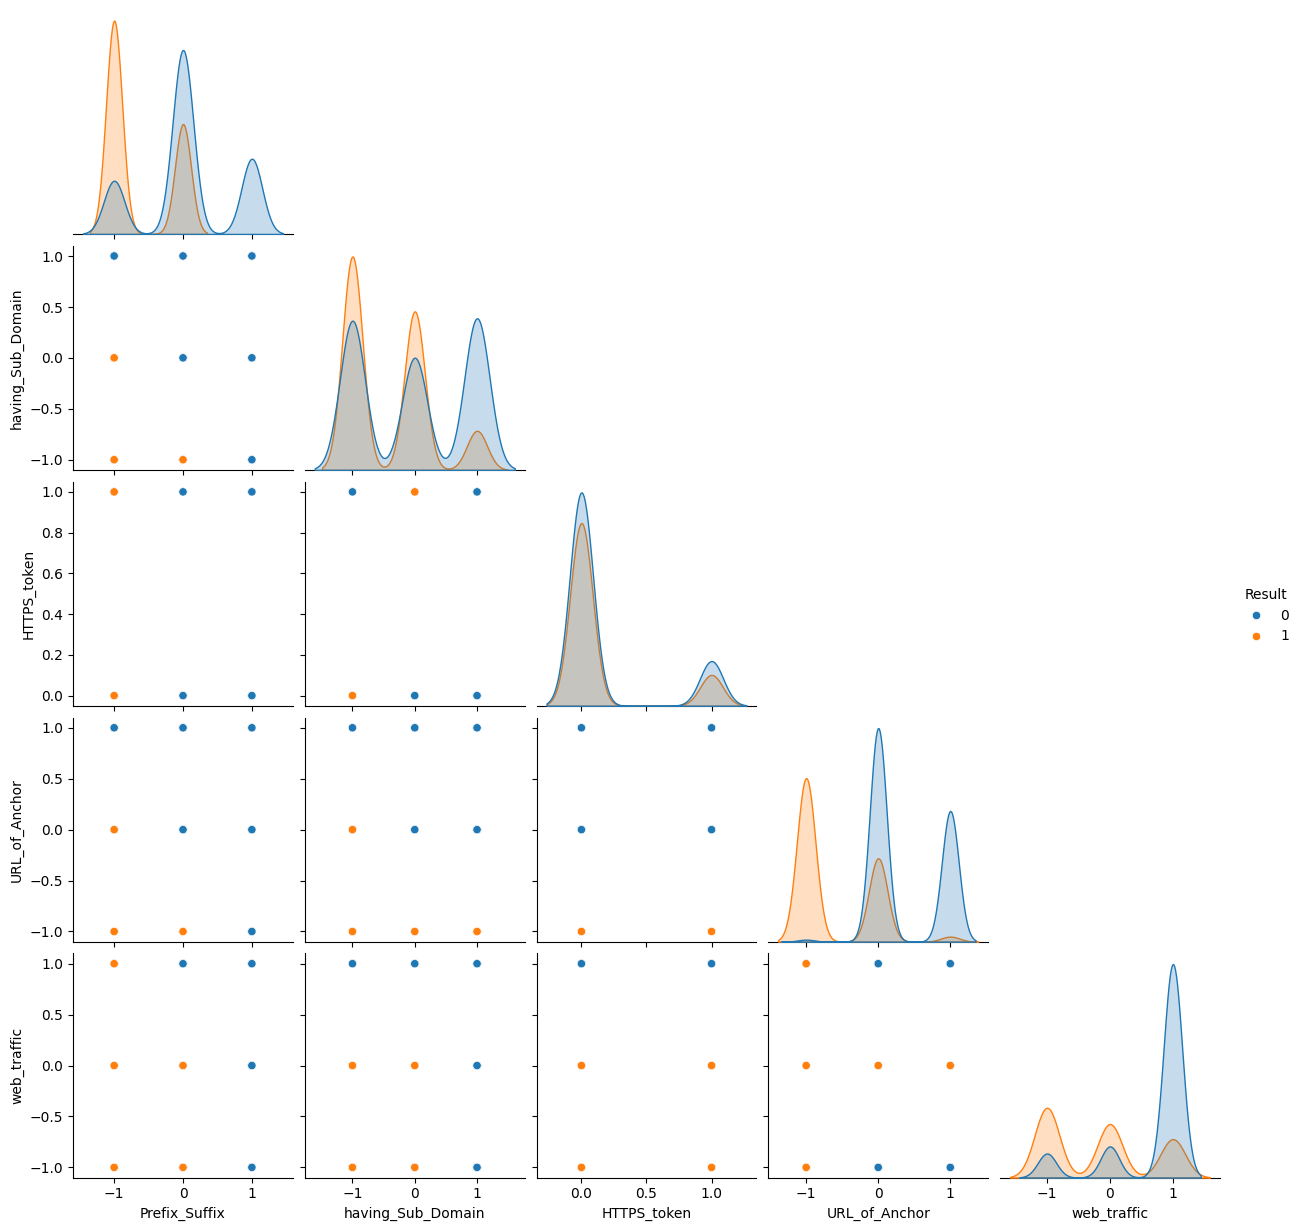

In [20]:

#pairplot for particular features

df = df[['Prefix_Suffix', 'having_Sub_Domain', 'HTTPS_token','URL_of_Anchor','web_traffic','Result']]
sns.pairplot(df, hue="Result",corner=True);
# to show
plt.show()

In [21]:

X = df.drop('Result', axis=1)
y = df['Result']



In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


In [23]:
print(X_train.shape)
print(X_test.shape)

(1964, 5)
(492, 5)


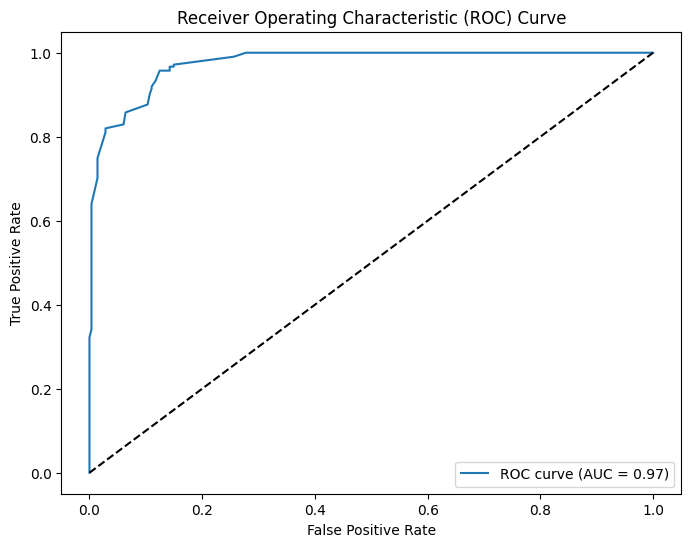

Accuracy: 0.90


In [24]:
# Splitting the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Getting predicted probabilities for positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculating AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_probs)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculating accuracy
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.2f}")


Training Accuracy:  0.8986761710794298
Testing Accuracy  0.8963414634146342
Training True Positive Rate:  0.9037372593431483
Testing True Positive Rate:  0.9004739336492891


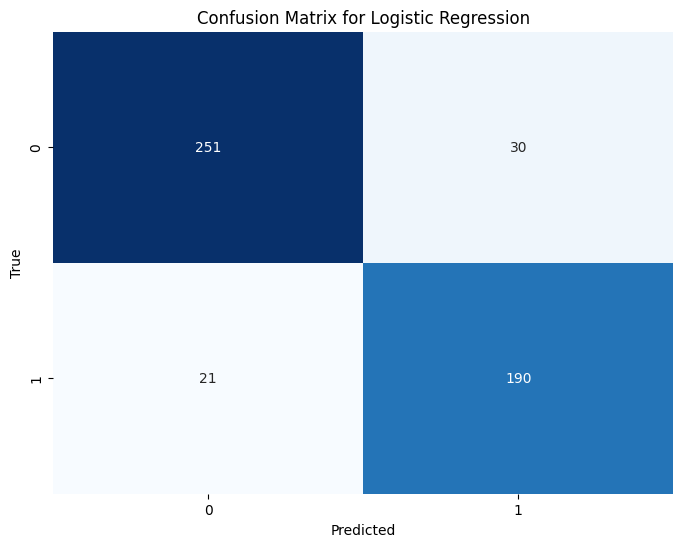

In [25]:
LG = LogisticRegression()
LG.fit(X_train, y_train)
# Predict on the test set


print('Training Accuracy: ', LG.score(X_train,y_train))
print('Testing Accuracy ', LG.score(X_test, y_test))
tn, fp, fn, tp = confusion_matrix(y_train,LG.predict(X_train)).ravel()
print('Training True Positive Rate: ', (tp)/(tp+fn))

tn, fp, fn, tp = confusion_matrix(y_test,LG.predict(X_test)).ravel()
print('Testing True Positive Rate: ', (tp)/(tp+fn))

## Create a logistic regression classifier
logreg_classifier = LogisticRegression()

# Train the logistic regression classifier
model_logreg = logreg_classifier.fit(X_train, y_train)

# Get predictions for the testing set
logreg_predict = model_logreg.predict(X_test)

# Calculate confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, logreg_predict)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [26]:
# using svm
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Standardize the feature values
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)


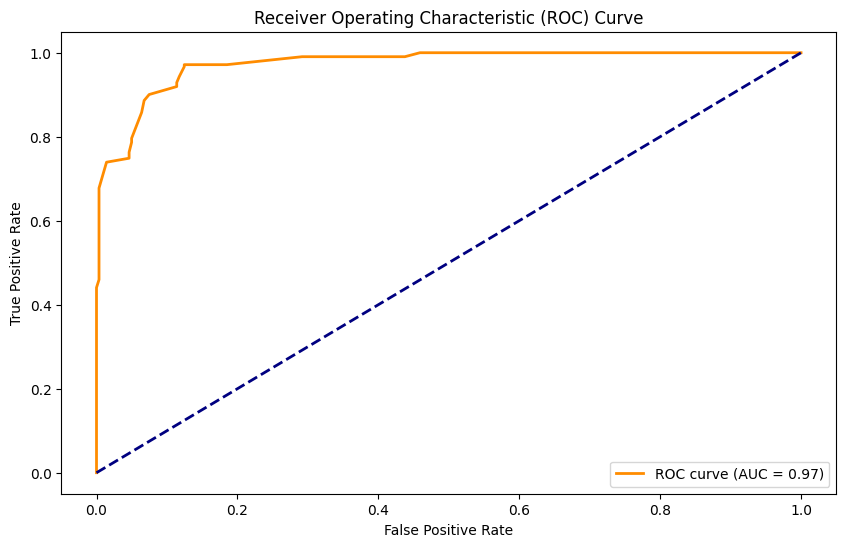

In [28]:
# Create an SVM classifier
svc = SVC(kernel='rbf', C=1.0)

# Train the SVM classifier
model_5 = svc.fit(train_X, train_Y)

# Get predicted probabilities for the positive class
y_prob = model_5.decision_function(test_X)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_Y, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [29]:
# Get predictions for both training and testing sets
train_predictions = model_5.predict(train_X)
test_predictions = model_5.predict(test_X)

# Evaluate the accuracy of the model on training set
train_accuracy = accuracy_score(train_Y, train_predictions)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate the accuracy of the model on testing set
test_accuracy = accuracy_score(test_Y, test_predictions)
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')
# Calculate confusion matrix for training set
conf_matrix_train = confusion_matrix(train_Y, train_predictions)
# True positive rate for training set
train_tpr = conf_matrix_train[1, 1] / (conf_matrix_train[1, 1] + conf_matrix_train[1, 0])
print(f'Training True Positive Rate (Sensitivity): {train_tpr * 100:.2f}%')

# Calculate confusion matrix for testing set
conf_matrix_test = confusion_matrix(test_Y, test_predictions)
# True positive rate for testing set
test_tpr = conf_matrix_test[1, 1] / (conf_matrix_test[1, 1] + conf_matrix_test[1, 0])
print(f'Testing True Positive Rate (Sensitivity): {test_tpr * 100:.2f}%')

Training Accuracy: 91.14%
Testing Accuracy: 91.46%
Training True Positive Rate (Sensitivity): 95.58%
Testing True Positive Rate (Sensitivity): 96.68%


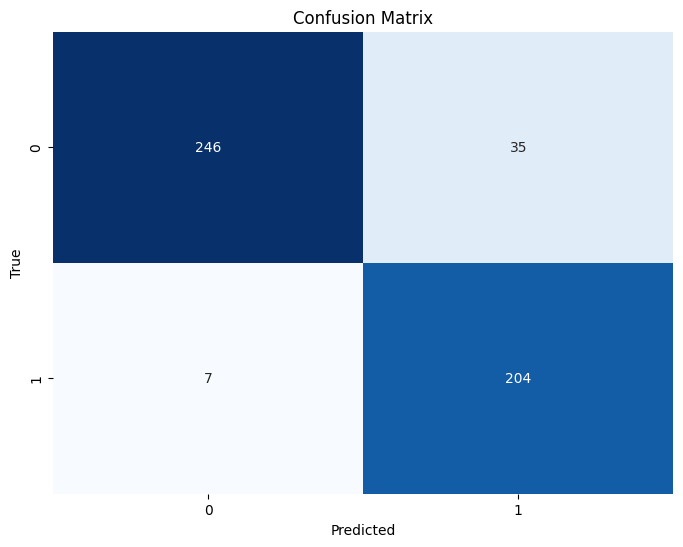

In [30]:
# Get predictions for the testing set
svm_predict = model_5.predict(test_X)

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_Y, svm_predict)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()